In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import mols2grid
import rdkit.Chem.MolStandardize 

In [11]:
#PandasTools.AddMoleculeColumnToFrame(table2, smilesCol='smiles')
#PandasTools.FrameToGridImage(table2, molsPerRow=4, maxMols = 150, subImgSize=(500,800))

## Supplementary	Table	1: This table contains the structures of the antibiotics used to validate the accumulation assay

Data	for	all	control	antibiotics.	Structures,	spectrum	of	activity,	MW,	
ClogD7.4,	 number	 of	 rotational	 bonds	 (RB),	 globularity	 (Glob),	 the	 plane-of-best-fit	 score	
(PBF)45,	normalized	first	principal	moment	of	inertia	(PMI1/MW)47,	and	the	accumulation	for	
each	antibiotic	in	E.	coli	MG1655	is	provided,	as	well	as	standard	error	of	three	replicates.

In [12]:
table1 = pd.read_excel('DATA_nature.xlsx', sheet_name='Table1', skiprows=[0])
table1_gram_neg = table1[table1['Spectrum'] == 'Gram-negative']
table1_gram_neg

,Canonical SMILES,name,Permeability coefficient,Charge,Accum_SE,Accum_class,Molecular_weight,clogD7.4,RB,glob,PBF,pmi1_MW,Spectrum
8,O=C([C@@H](c1ccccc1)[NH3+])N[C@@H]2C(N3[C@H](C...,Ampcillin,45,±,11,Low,349,-3.39,4,0.12,0.87,3.54,Gram-negative
9,O=C(C1=C([O-])[C@@](O)(C(C2=C(c3c([C@](C)([C@H...,Tetracycline,1759,+ - -,160,High,444,-2.84,2,0.20,1.11,4.11,Gram-negative
10,Fc1cc2c(N(C=C(C2=O)C([O-])=O)C3CC3)cc1N4CC[NH2...,Ciprofloxacin,2263,±,286,High,331,-1.39,3,0.07,0.69,3.28,Gram-negative
11,ClC(C(N[C@H](CO)[C@@H](c1ccc([N+]([O-])=O)cc1)...,Chloramphenicol,709,neutral,45,High,323,0.66,6,0.15,0.87,3.52,Gram-negative


In [13]:
mols2grid.display(table1_gram_neg, smiles_col="Canonical SMILES", size=(250, 250))

MolGridWidget()

In [14]:
table2 = pd.read_excel('DATA_nature.xlsx', sheet_name='Table2', skiprows=[0])
features = ['Canonical SMILES', 'Charge', 'name', 'Permeability coefficient', 'Accum_class']
mixed_data = table2[features]
mixed_data.head()

,Canonical SMILES,Charge,name,Permeability coefficient,Accum_class
0,O=S(O[C@H]1[C@H]2OC[C@@H]([C@H]2OC1)[NH3+])(c3...,+,2-1,1965,High
1,Brc1ccc(S(=O)(O[C@H]2[C@H]3OC[C@@H]([C@H]3OC2)...,+,2-2,1647,High
2,O[C@]12C(C[C@]3([C@@H](C[NH3+])c4c(C)cccc4[C@H...,+,2-3,1335,High
3,[NH3+]C[C@H]1c2c([C@@H]3[C@]14C[C@H]([C@](C4)(...,+ +,2-4,946,High
4,O[C@@]12C(C[C@@]3(C2)[C@H](c4c([C@H]3CC1)cccc4...,+,2-5,756,High


In [15]:
mols2grid.display(mixed_data, smiles_col="Canonical SMILES", size=(250, 150))

MolGridWidget()

In [16]:
table2_compounds = table2['name'].tolist()
#table2_compounds

## Table 3

In [17]:
table3 = pd.read_excel('DATA_nature.xlsx', sheet_name='Table3', skiprows=[0])
table3.head()

,Canonical SMILES,Charge,name,other tables,table,page,row,Permeability coefficient,Accum_SE,Accum_class,Molecular_weight,clogD7.4,RB,glob,PBF,pmi1_MW
0,O=S(O[C@H]1[C@H]2OC[C@@H]([C@H]2OC1)[NH3+])(c3...,+,3-1,"2-1, 4-1",3,1,1,1965,108,High,362.428,0.60,4,0.06,0.90,2.69
1,S(=O)(=O)(O[C@H]1[C@H]2OC[C@H](NC(=O)C)[C@H]2O...,neutral,3-2,0,3,1,2,71,11,Low,403.457,2.32,5,0.06,0.90,4.31
2,Brc1ccc(S(=O)(O[C@H]2[C@H]3OC[C@@H]([C@H]3OC2)...,+,3-3,"2-2, 4-5",3,2,1,1647,108,High,365.230,-0.28,3,0.12,0.89,2.40
3,Brc1ccc(S(=O)(O[C@H]2[C@H]3OC[C@@H]([C@H]3OC2)...,+,3-4,2-20,3,2,2,176,7,Low,379.257,0.11,4,0.11,0.91,2.73
4,Brc1ccc(S(=O)(O[C@H]2[C@H]3OC[C@@H]([C@H]3OC2)...,+,3-5,0,3,2,3,7,1,Low,392.276,1.47,4,0.11,0.92,3.53


In [18]:
table3_new = table3[features].copy()
for index in table3.index:
    other_tables = table3.loc[index, 'other tables'].split(', ')
    #print(index, other_tables, list(set(table2_compounds) & set(other_tables)))
    if list(set(table2_compounds) & set(other_tables)) != []:
        table3_new.drop(index, inplace=True)

In [19]:
table3_compounds = table3['name'].tolist()
#table3_compounds

## Table 4

In [20]:
table4 = pd.read_excel('DATA_nature.xlsx', sheet_name='Table4', skiprows=[0])
table4.head()

,Canonical SMILES,Charge,name,other tables,mseq,Permeability coefficient,Accum_SE,Accum_class,Excluded,ASA,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,O=S(OC1C2OCC(C2OC1)[NH3+])(c3ccc(c4ccccc4)cc3)=O,+,4-1,"2-1, 3-1",1,1965.0,108.0,High,F,589.37537,...,491.18533,131.98276,37.599136,12.189655,0.918103,0.000000,0.0,1607,39,138
1,COc1ccc(CC2N(CCC34C2CC(C(C4)[NH3+])O)C)c3c1O,+,4-2,0,2,1913.0,156.0,High,F,514.13593,...,493.00000,180.00000,51.000000,15.375000,2.375000,0.125000,0.0,976,50,134
2,OC12C(CC3(C2)C(c4c(C3CC1)cccc4C)CC[NH3+])=C,+,4-3,0,3,1887.0,179.0,High,F,494.43210,...,431.03571,140.42857,39.464287,12.125000,1.375000,0.053571,0.0,753,44,126
3,O=C1C2(CC3(C1)C(c4c(C3CC2)cccc4C)C[NH3+])C,+,4-3a,0,64,1696.0,203.0,High,F,471.00363,...,362.12500,112.43750,32.125000,9.750000,0.812500,0.000000,0.0,650,43,122
4,OC12C(CC3(C2)C(c4c(C3CC1)cccc4C)C[NH3+])C,+,4-4,0,4,1650.0,69.0,High,F,479.01715,...,404.91666,133.16667,37.250000,10.958333,1.250000,0.041667,0.0,650,43,122


In [21]:
mols2grid.display(table4, smiles_col="Canonical SMILES", size=(150, 250))

MolGridWidget()

In [22]:
table4_new = table4.copy()
for index in table4.index:
    other_tables = table4.loc[index, 'other tables'].split(', ')
    #print(index, other_tables, list(set(table2_compounds) & set(other_tables)))
    if list(set(table2_compounds) & set(other_tables)) != []:
       table4_new.drop(index, inplace=True)
       #print('deleted')

In [23]:
for index in table4_new.index:
    other_tables = table4_new.loc[index, 'other tables'].split(', ')
    #print(index, other_tables, list(set(table3_compounds) & set(other_tables)))
    if list(set(table3_compounds) & set(other_tables)) != []:
       table4_new.drop(index, inplace=True)
       #print('deleted')

table4_new= table4_new[features]

In [24]:
#concatenate 3 pandas DataFrames

data = [table4_new ,table3_new, mixed_data, table1_gram_neg[features] ]

nature_dat = pd.concat(data, axis=0, ignore_index=True)
nature_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Canonical SMILES          191 non-null    object 
 1   Charge                    191 non-null    object 
 2   name                      191 non-null    object 
 3   Permeability coefficient  191 non-null    float64
 4   Accum_class               191 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


In [27]:
nature_dat.to_csv(r'C:\Users\olshana1\Documents\new-progect-about-gram-negative-bacteria-main/work with NATURE dataset/data_for_machine_learning_course(CLEAN!).csv', index=False, header=True)

## Cleaning

In [25]:
list_charges = ['+ - - - ', ' - -', '- - ', '+ ']

for index in nature_dat.index:
    #print(index)
    charge = nature_dat.loc[index, 'Charge']
    #print(charge)
    if charge == '+ - - - ':
        nature_dat.loc[index, 'Charge'] = '+ - - -'

    if charge == ' - -':
        nature_dat.loc[index, 'Charge'] = '- -'

    if charge == '- - ':
        nature_dat.loc[index, 'Charge'] = '- -'

    if charge == '+ ':
        nature_dat.loc[index, 'Charge'] = '+'


In [26]:
nature_dat['Charge'].unique()

array(['+', '+ +', 'neutral', '±', '-', '- -', '+ - - -', '+ - -'],
      dtype=object)

In [27]:
nature_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Canonical SMILES          191 non-null    object 
 1   Charge                    191 non-null    object 
 2   name                      191 non-null    object 
 3   Permeability coefficient  191 non-null    float64
 4   Accum_class               191 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


<Axes: xlabel='Charge', ylabel='Permeability coefficient'>

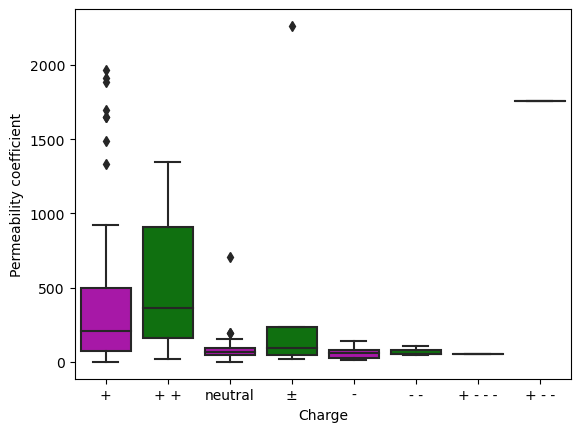

In [28]:
sns.boxplot(x='Charge', y='Permeability coefficient', palette=["m", "g"], data=nature_dat)

In [32]:
nature_dat.to_csv(r'C:\Users\olshana1\Documents\new-progect-about-gram-negative-bacteria-main/work with NATURE dataset/mixed_data(to_work)_for docking.csv', index=False, header=True)

In [30]:
mols2grid.display(nature_dat, smiles_col="Canonical SMILES", size=(250, 150))

MolGridWidget()